# 資料預處理：看清楚datatype，有問號的會變成object，不是numeric

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import numpy as np 
import pandas as pd
import os 

filepath = '/Users/mac/Desktop/Kaggle_datasets/Cervical_Cancer_Risk_Classification/'
filename = 'kag_risk_factors_cervical_cancer.csv'

df_full = pd.read_csv(os.path.join(filepath+filename))

In [3]:
df_full

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


In [4]:
df_fullna = df_full.replace('?', np.nan) #把可惡的「？」用np.nan替換掉，待會可以直接轉換成numeric

In [5]:
df_fullna.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [6]:
df = df_fullna #做紀錄XD

In [7]:
df = df.convert_objects(convert_numeric=True) #把這些混蛋「？」變成的object項目通通轉成numeric type才能做運算

In [8]:
df.info() #已經都變成numeric了

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

In [9]:
# for continuous variable
df['Number of sexual partners'] = df['Number of sexual partners'].fillna(df['Number of sexual partners'].median())
df['First sexual intercourse'] = df['First sexual intercourse'].fillna(df['First sexual intercourse'].median())
df['Num of pregnancies'] = df['Num of pregnancies'].fillna(df['Num of pregnancies'].median())
df['Smokes'] = df['Smokes'].fillna(1)
df['Smokes (years)'] = df['Smokes (years)'].fillna(df['Smokes (years)'].median())
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median())
df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].fillna(1)
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median())
df['IUD'] = df['IUD'].fillna(0) # Under suggestion
df['IUD (years)'] = df['IUD (years)'].fillna(0) #Under suggestion
df['STDs'] = df['STDs'].fillna(1)
df['STDs (number)'] = df['STDs (number)'].fillna(df['STDs (number)'].median())
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].median())
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].fillna(df['STDs:cervical condylomatosis'].median())
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].median())
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].median())
df['STDs:syphilis'] = df['STDs:syphilis'].fillna(df['STDs:syphilis'].median())
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].median())
df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].median())
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].median())
df['STDs:AIDS'] = df['STDs:AIDS'].fillna(df['STDs:AIDS'].median())
df['STDs:HIV'] = df['STDs:HIV'].fillna(df['STDs:HIV'].median())
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].median())
df['STDs:HPV'] = df['STDs:HPV'].fillna(df['STDs:HPV'].median())
df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].fillna(df['STDs: Time since first diagnosis'].median())
df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].fillna(df['STDs: Time since last diagnosis'].median())

In [10]:
#處理類別變項
df = pd.get_dummies(data=df, columns=['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

In [11]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
STDs: Time since first diagnosis      0
STDs: Time since last diagnosis       0
Biopsy                                0


In [12]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,Dx:HPV_0,Dx:HPV_1,Dx_0,Dx_1,Hinselmann_0,Hinselmann_1,Citology_0,Citology_1,Schiller_0,Schiller_1
0,18,4.0,15.0,1.0,0.000000,0.00,0.00,0.00,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
1,15,1.0,14.0,1.0,0.000000,0.00,0.00,0.00,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
2,34,1.0,17.0,1.0,0.000000,0.00,0.00,0.00,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
3,52,5.0,16.0,4.0,37.000000,37.00,3.00,0.00,0.0,0.0,...,0,1,1,0,1,0,1,0,1,0
4,46,3.0,21.0,4.0,0.000000,0.00,15.00,0.00,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
5,42,3.0,23.0,2.0,0.000000,0.00,0.00,0.00,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
6,51,3.0,17.0,6.0,34.000000,3.40,0.00,7.00,0.0,0.0,...,1,0,1,0,0,1,1,0,0,1
7,26,1.0,26.0,3.0,0.000000,0.00,2.00,7.00,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
8,45,1.0,20.0,5.0,0.000000,0.00,0.00,0.00,0.0,0.0,...,0,1,0,1,1,0,1,0,1,0
9,44,3.0,15.0,2.0,1.266973,2.80,0.00,0.00,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0


In [13]:
df_data = df #做紀錄

## 查看Outlier

In [14]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,Dx:HPV_0,Dx:HPV_1,Dx_0,Dx_1,Hinselmann_0,Hinselmann_1,Citology_0,Citology_1,Schiller_0,Schiller_1
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,1.201241,0.446278,2.035331,0.444604,0.155012,0.051282,...,0.979021,0.020979,0.972028,0.027972,0.959207,0.040793,0.948718,0.051282,0.913753,0.086247
std,8.497948,1.644759,2.791883,1.400981,4.060623,2.210351,3.567040,1.814218,0.529617,0.220701,...,0.143398,0.143398,0.164989,0.164989,0.197925,0.197925,0.220701,0.220701,0.280892,0.280892
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


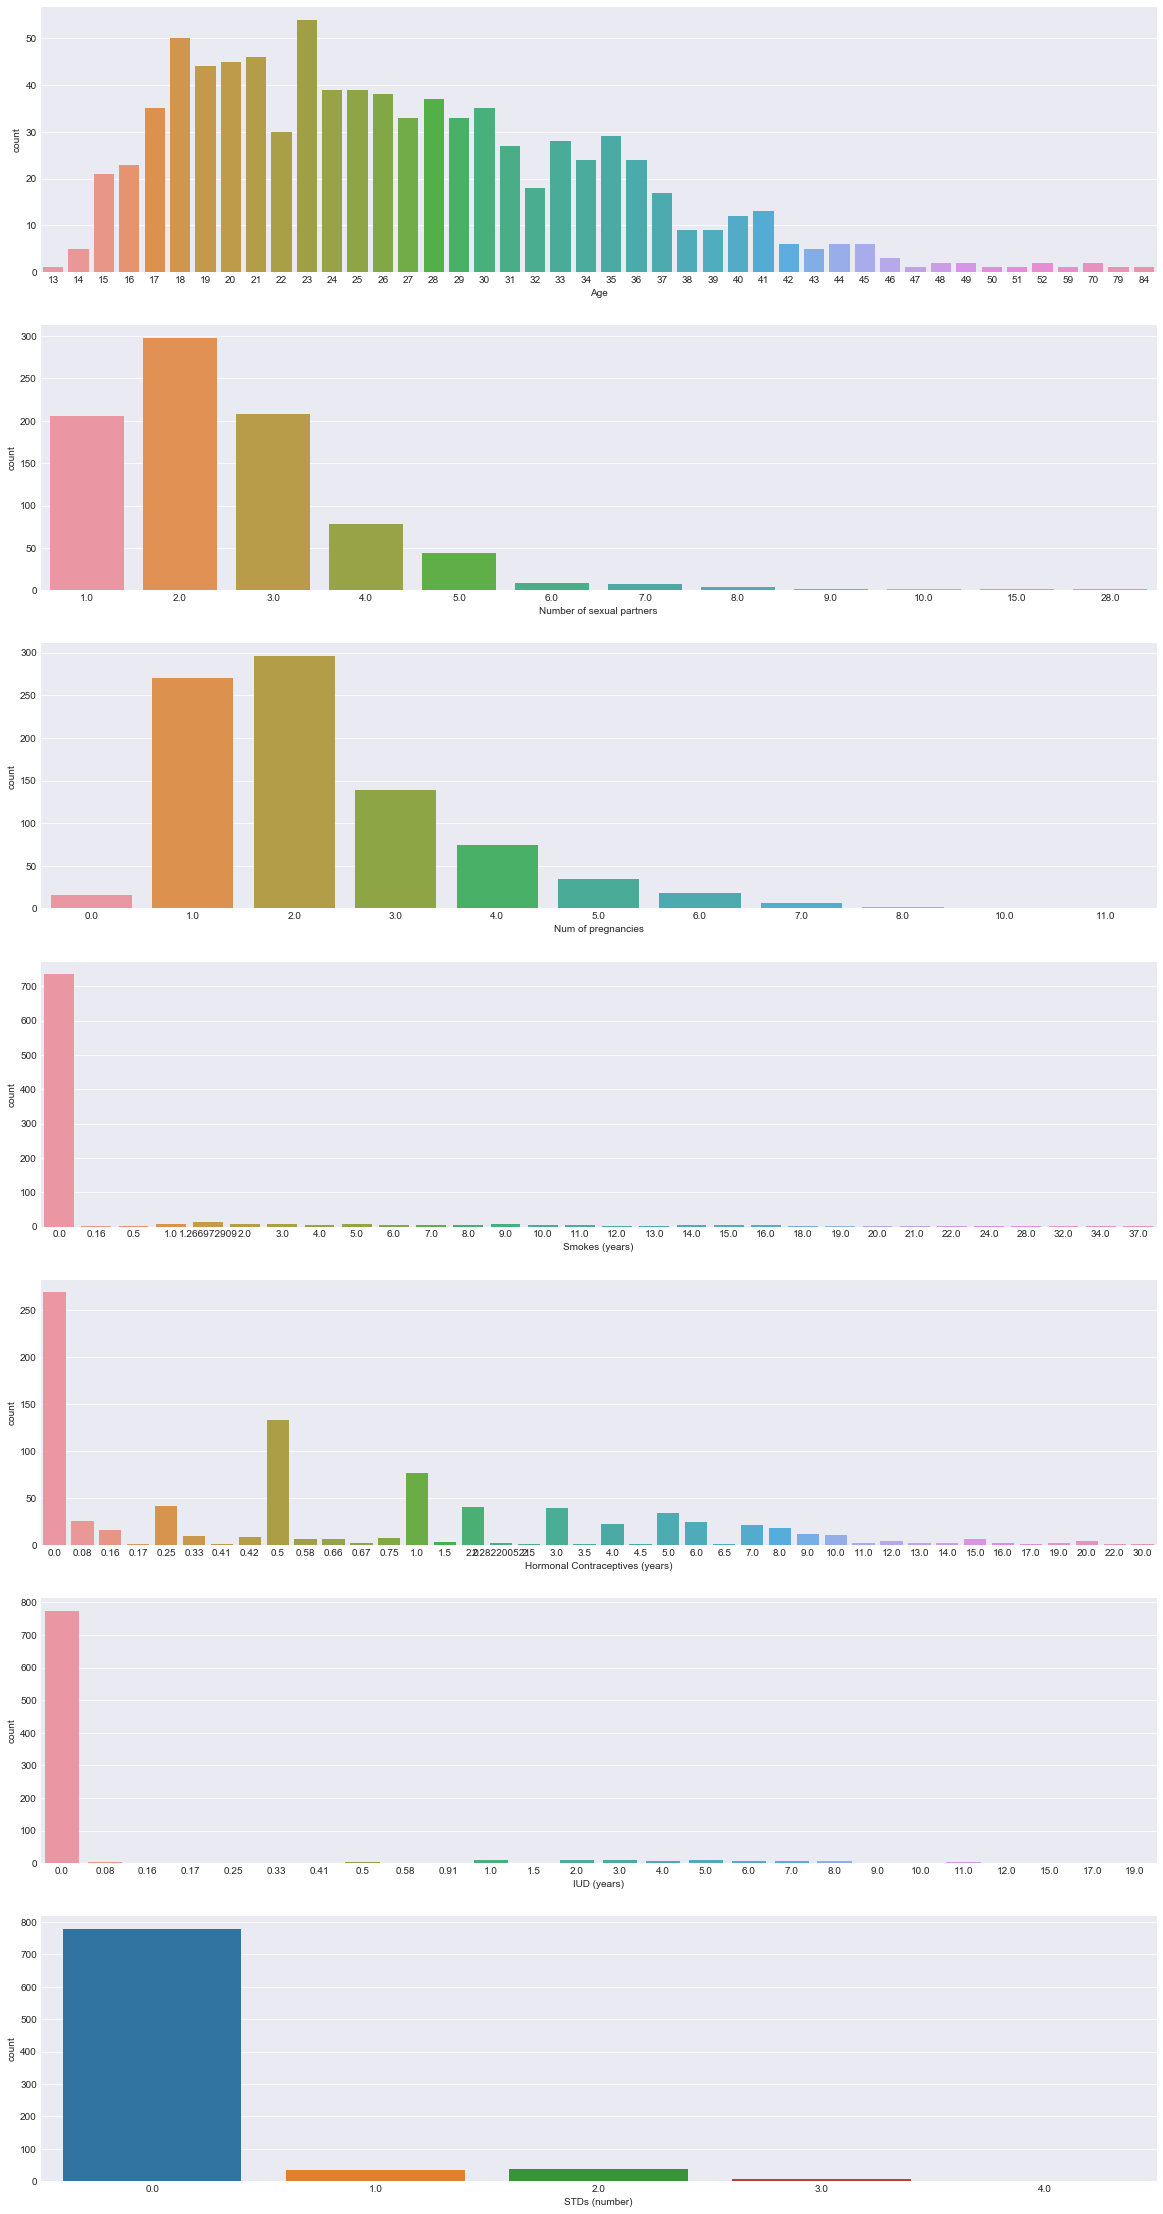

In [15]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,figsize=(20,40))
sns.countplot(x='Age', data=df, ax=ax1)
sns.countplot(x='Number of sexual partners', data=df, ax=ax2)
sns.countplot(x='Num of pregnancies', data=df, ax=ax3)
sns.countplot(x='Smokes (years)', data=df, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=df, ax=ax5)
sns.countplot(x='IUD (years)', data=df, ax=ax6)
sns.countplot(x='STDs (number)', data=df, ax=ax7)

## 做shuffle分類train/test data，並且標示feature/labels，資料標準化

In [16]:
#Shuffle
np.random.seed(42)
df_data_shuffle = df_data.iloc[np.random.permutation(len(df_data))]

df_train = df_data_shuffle.iloc[1:686, :]
df_test = df_data_shuffle.iloc[686: , :]

In [17]:
df_data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Biopsy', 'Smokes_0.0', 'Smokes_1.0', 'Hormonal Contraceptives_0.0',
       'Hormonal Contraceptives_1.0', 'IUD_0.0', 'IUD_1.0', 'STDs_0.0',
       'STDs_1.0', 'Dx:Cancer_0', 'Dx:Cancer_1', 'Dx:CIN_0', 'Dx:CIN_1',
       'Dx:HPV_0', 'Dx:HPV_1', 'Dx_0', 'Dx_1', 'Hinselmann_0', 'Hinselmann_1',
       'Citology_0', 'Citology_1', 'Schiller_0', 'Schill

In [18]:
#分類feature/label
df_train_feature = df_train[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis','Smokes_0.0', 'Smokes_1.0',
       'Hormonal Contraceptives_0.0', 'Hormonal Contraceptives_1.0', 'IUD_0.0',
       'IUD_1.0', 'STDs_0.0', 'STDs_1.0', 'Dx:Cancer_0', 'Dx:Cancer_1',
       'Dx:CIN_0', 'Dx:CIN_1', 'Dx:HPV_0', 'Dx:HPV_1', 'Dx_0', 'Dx_1',
       'Hinselmann_0', 'Hinselmann_1', 'Citology_0', 'Citology_1','Schiller_0','Schiller_1']]

train_label = np.array(df_train['Biopsy'])

df_test_feature = df_test[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis','Smokes_0.0', 'Smokes_1.0',
       'Hormonal Contraceptives_0.0', 'Hormonal Contraceptives_1.0', 'IUD_0.0',
       'IUD_1.0', 'STDs_0.0', 'STDs_1.0', 'Dx:Cancer_0', 'Dx:Cancer_1',
       'Dx:CIN_0', 'Dx:CIN_1', 'Dx:HPV_0', 'Dx:HPV_1', 'Dx_0', 'Dx_1',
       'Hinselmann_0', 'Hinselmann_1', 'Citology_0', 'Citology_1','Schiller_0','Schiller_1']]

test_label = np.array(df_test['Biopsy'])

In [19]:
#Normalization
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
train_feature = minmax_scale.fit_transform(df_train_feature)
test_feature = minmax_scale.fit_transform(df_test_feature)

In [20]:
#確認資料樣子是否ok
print(train_feature[0])
print(train_label[0])
print(test_feature[0])
print(test_label[0])

[ 0.14084507  0.07407407  0.31818182  0.18181818  0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.14285714  0.0952381   1.          0.          1.          0.
  1.          0.          1.          0.          1.          0.          1.
  0.          1.          0.          1.          0.          1.          0.
  1.          0.          1.          0.        ]
0
[ 0.61764706  0.33333333  0.25        0.42857143  0.28125     0.3375
  0.89473684  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.15        0.1         0.          1.          0.
  1.          1.          0.          1.          0.          1.          0.
  1.          0.          1.          0.          1.          0.          1.
  0.          1.          0.    

In [21]:
train_feature.shape

(685, 46)

# 跑模型囉～～

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              47000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 501       
Total para

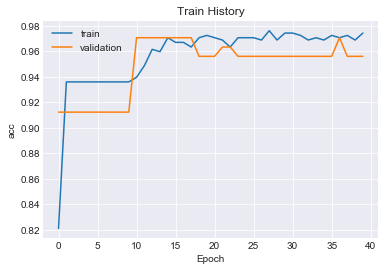

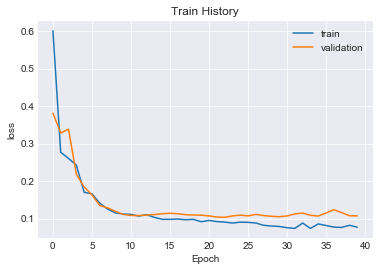

model saved to disk


In [22]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()


######################### 建立模型
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential() #一層一層到底，按順序

#輸入層（隱藏層1）
model.add(Dense(units=1000, 
                input_dim=46, 
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

#隱藏層2，不用寫input_dim，因為就是前一層的units
model.add(Dense(units=500,  
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=500,  
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))


#輸出層
model.add(Dense(units=1, #輸出一個數字 
                kernel_initializer='uniform', 
                activation='sigmoid'))

print(model.summary()) #可以清楚看到model還有參數數量


######################### 訓練模型
#選擇loss度量，optimizer學習路徑速度、
model.compile(loss='binary_crossentropy',   #二元用binary
              optimizer='adam', metrics=['accuracy'])

#開始train，並且記錄情況(設有val項以免overfitting)
train_history = model.fit(x=train_feature, y=train_label,  #上面多分割一步在keras是內建的
                          validation_split=0.2, epochs=40, batch_size=200, verbose=2) #verbose=2表示顯示訓練過程


######################### 訓練過程視覺化
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

#儲存訓練結果
model.save_weights("Savemodels/Cervical_ca(Kaggles)_MLP.h5")
print('model saved to disk')

## Test set 精準率: 94%

In [23]:
scores = model.evaluate(test_feature, test_label)
print('\n')
print('accuracy=',scores[1])

160/172 [==========================>...] - ETA: 0s

accuracy= 0.93023255814


In [24]:
######################### 紀錄模型預測情形（答案卷）
prediction = model.predict_classes(test_feature)

 32/172 [====>.........................] - ETA: 0s

In [25]:
df_ans = pd.DataFrame({'Biopsy' :test_label})
df_ans['Prediction'] = prediction

In [26]:
df_ans

,Biopsy,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [27]:
df_ans[ df_ans['Biopsy'] != df_ans['Prediction'] ]

,Biopsy,Prediction
48,1,0
65,1,0
76,0,1
80,0,1
102,0,1
111,1,0
121,0,1
128,1,0
135,0,1
145,0,1


In [28]:
df_ans['Prediction'].value_counts()

0    160
1     12
Name: Prediction, dtype: int64

In [29]:
df_ans['Biopsy'].value_counts()

0    164
1      8
Name: Biopsy, dtype: int64

## Train set 精確率：97.81%

In [30]:
scores = model.evaluate(train_feature, train_label)
print('\n')
print('accuracy=',scores[1])

576/685 [========================>.....] - ETA: 0s

accuracy= 0.972262773723


In [31]:
prediction_train = model.predict_classes(train_feature)

576/685 [========================>.....] - ETA: 0s

In [32]:
df_train_ans = pd.DataFrame({'Biopsy': train_label})
df_train_ans['Prediction'] = prediction_train

In [33]:
df_train_ans

,Biopsy,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [34]:
df_train_ans[ df_train_ans['Biopsy'] != df_train_ans['Prediction'] ]

,Biopsy,Prediction
102,0,1
125,1,0
163,0,1
214,1,0
325,1,0
340,0,1
353,0,1
361,1,0
369,0,1
371,1,0


In [35]:
df_train_ans['Prediction'].value_counts()

0    635
1     50
Name: Prediction, dtype: int64

In [36]:
df_train_ans['Biopsy'].value_counts()

0    638
1     47
Name: Biopsy, dtype: int64

# Confusion matrix

total test case number:  172


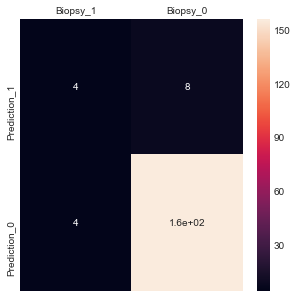

In [37]:
cols = ['Biopsy_1','Biopsy_0']  #Gold standard
rows = ['Prediction_1','Prediction_0'] #diagnostic tool (our prediction)

B1P1 = len(df_ans[(df_ans['Prediction'] == df_ans['Biopsy']) & (df_ans['Biopsy'] == 1)])
B1P0 = len(df_ans[(df_ans['Prediction'] != df_ans['Biopsy']) & (df_ans['Biopsy'] == 1)])
B0P1 = len(df_ans[(df_ans['Prediction'] != df_ans['Biopsy']) & (df_ans['Biopsy'] == 0)])
B0P0 = len(df_ans[(df_ans['Prediction'] == df_ans['Biopsy']) & (df_ans['Biopsy'] == 0)])

conf = np.array([[B1P1,B0P1],[B1P0,B0P0]])
df_cm = pd.DataFrame(conf, columns = [i for i in cols], index = [i for i in rows])

f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(df_cm, annot=True, ax=ax) 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.

print('total test case number: ', np.sum(conf))

## Calculating sensitivity, specificity, false_positive_rate and false_negative_rate

In [38]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

model_efficacy(conf)
    

total_num:  172
G1P1:  4
G0P1:  8
G1P0:  4
G0P0:  156
##########################
sensitivity:  0.5
specificity:  0.975
false_positive_rate:  0.0487804878049
false_negative_rate:  0.5


(172, 0.5, 0.97499999999999998, 0.04878048780487805, 0.5)

# 分析原始data

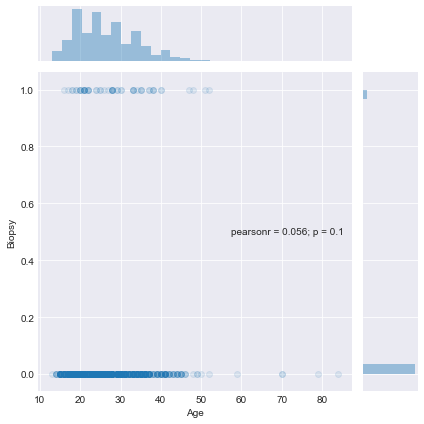

In [39]:
import seaborn as sns
sns.jointplot(x='Age', y='Biopsy', data=df, alpha=0.1) 
#By adding alpha, we can see the density of the scattered spots clearly.

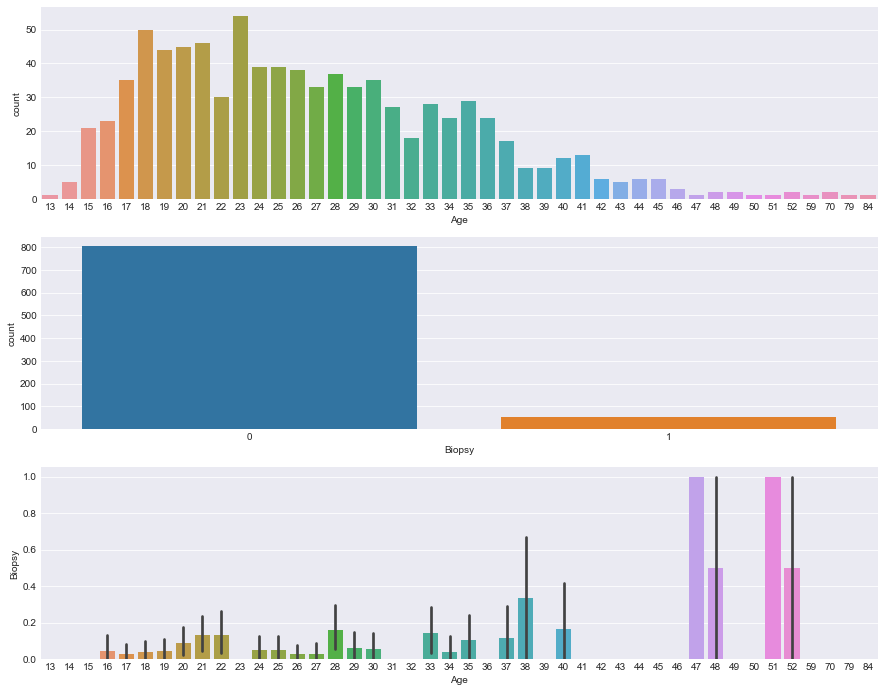

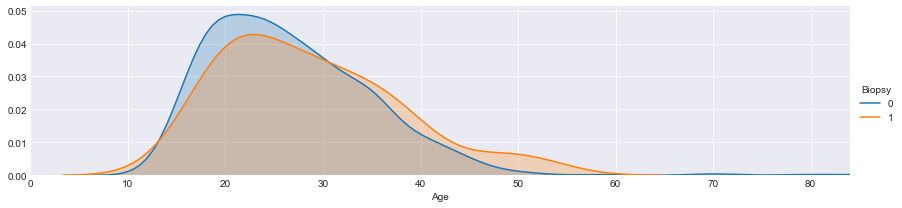

In [40]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,12))
sns.countplot(x='Age', data=df, ax=ax1)
sns.countplot(x='Biopsy', data=df, ax=ax2)
sns.barplot(x='Age', y='Biopsy', data=df, ax=ax3)

#Stratified
facet = sns.FacetGrid(df, hue='Biopsy',aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

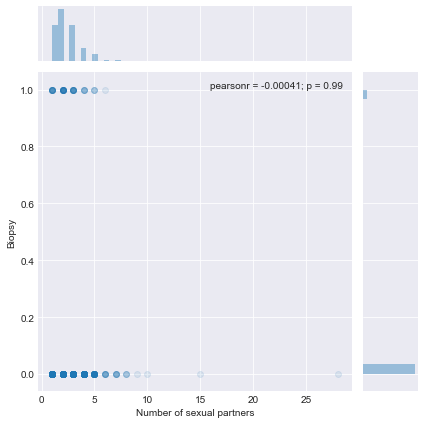

In [41]:
import seaborn as sns
sns.jointplot(x='Number of sexual partners', y='Biopsy', data=df, alpha=0.1) 
#By adding alpha, we can see the density of the scattered spots clearly.

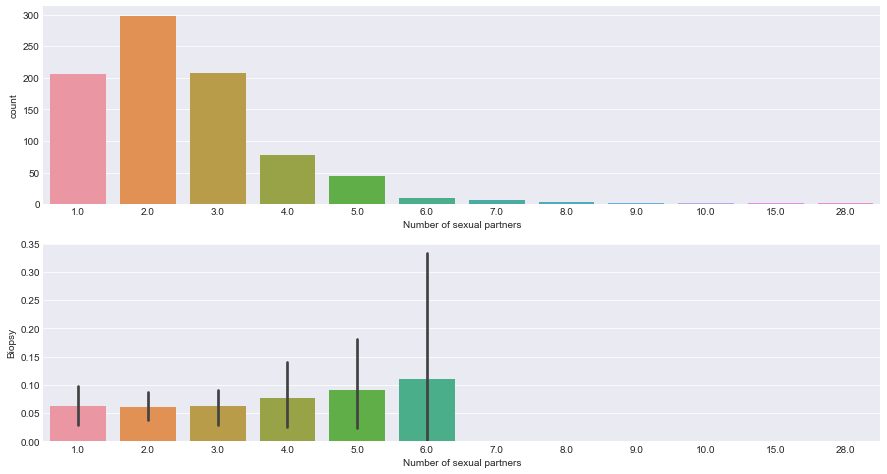

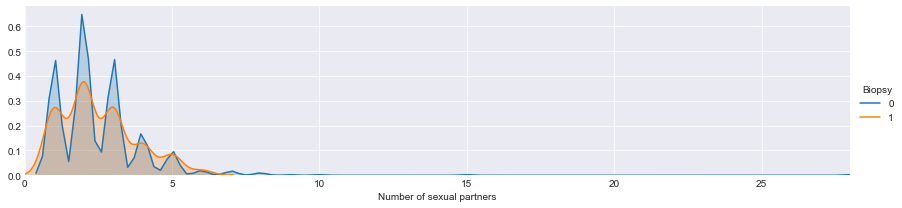

In [42]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,8))
sns.countplot(x='Number of sexual partners', data=df, ax=ax1)
sns.barplot(x='Number of sexual partners', y='Biopsy', data=df, ax=ax2) #categorical to categorical

#continuous to categorical
facet = sns.FacetGrid(df, hue='Biopsy',aspect=4)
facet.map(sns.kdeplot,'Number of sexual partners',shade= True)
facet.set(xlim=(0, df['Number of sexual partners'].max()))
facet.add_legend()

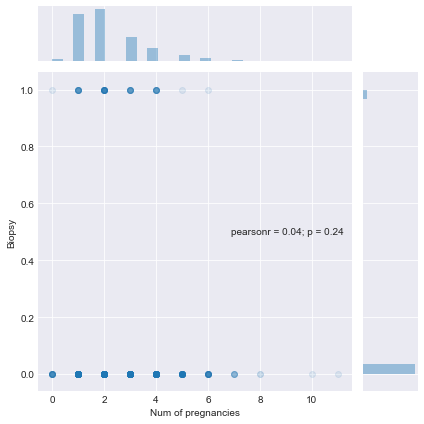

In [43]:
import seaborn as sns
sns.jointplot(x='Num of pregnancies', y='Biopsy', data=df, alpha=0.1) 

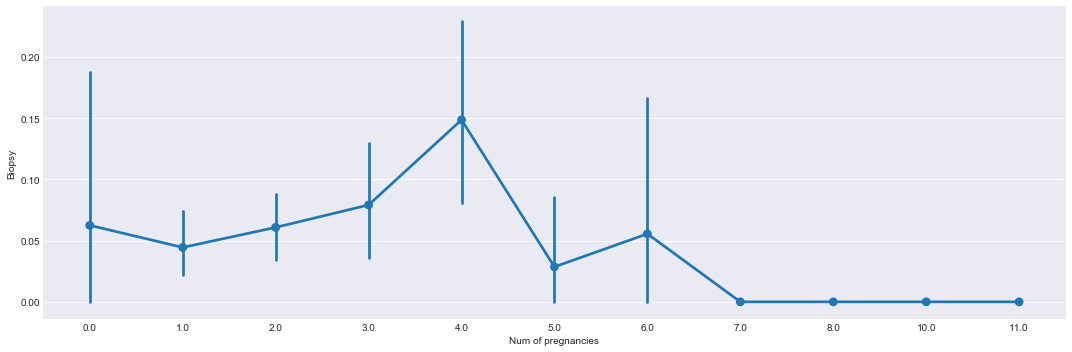

In [44]:
sns.factorplot('Num of pregnancies','Biopsy',data=df, size=5, aspect=3)

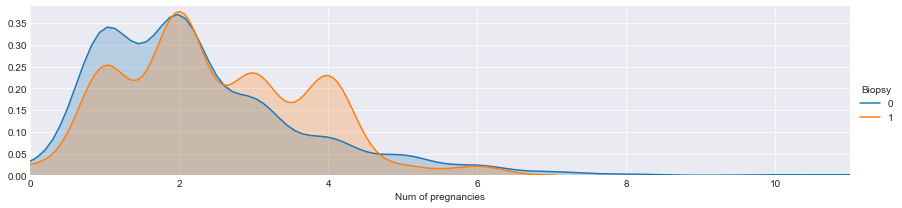

In [45]:
#continuous to categorical
facet = sns.FacetGrid(df, hue='Biopsy',aspect=4)
facet.map(sns.kdeplot,'Num of pregnancies',shade= True)
facet.set(xlim=(0, df['Num of pregnancies'].max()))
facet.add_legend()

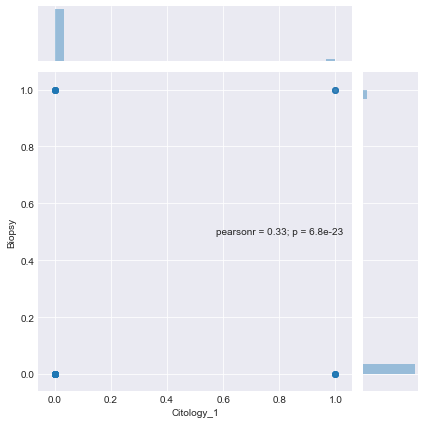

In [46]:
import seaborn as sns
sns.jointplot(x='Citology_1', y='Biopsy', data=df, alpha=0.1) 
# Hard do see anything...

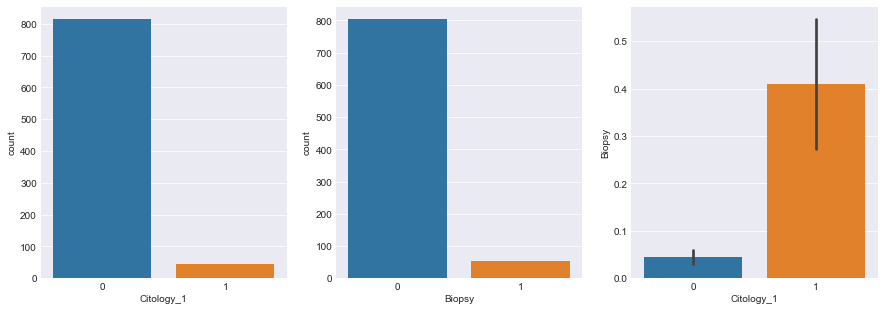

In [47]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Citology_1', data=df, ax=axis1)
sns.countplot(x='Biopsy', data=df, ax=axis2)
sns.barplot(x='Citology_1', y='Biopsy', data=df, ax=axis3)  #categorical to categorical

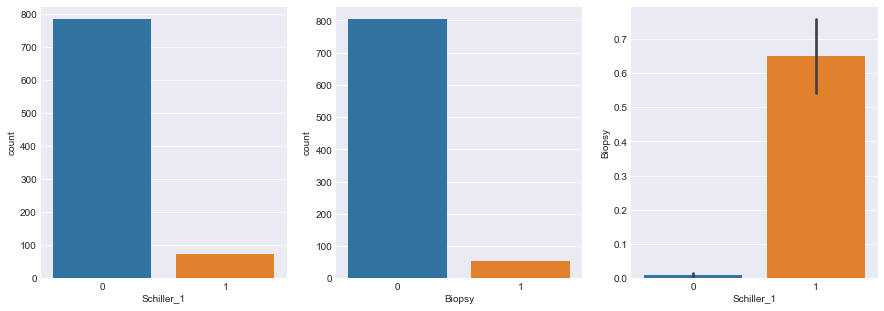

In [48]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Schiller_1', data=df, ax=axis1)
sns.countplot(x='Biopsy', data=df, ax=axis2)
sns.barplot(x='Schiller_1', y='Biopsy', data=df, ax=axis3) #categorical to categorical

# 使用前面fillna後的df

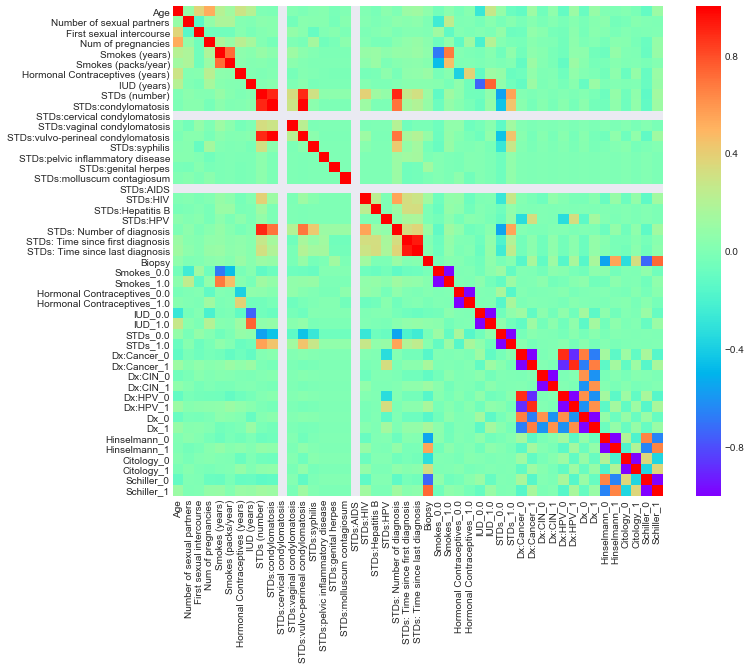

In [49]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True, cmap='rainbow')

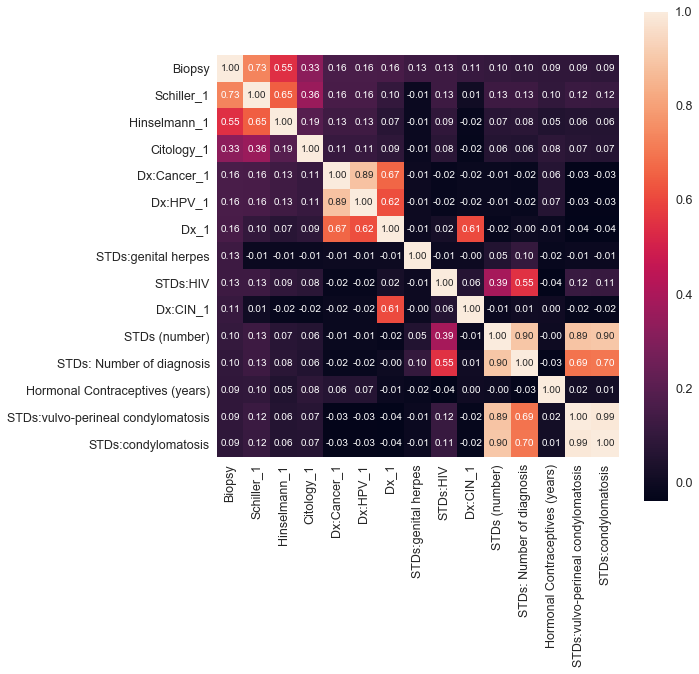

In [50]:
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Biopsy')['Biopsy'].index
cm = np.corrcoef(df[cols].values.T)

plt.figure(figsize=(9,9)) #可以調整大小

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()